<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/DeliveryTime_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Delivery_time -> Predict delivery time using sorting time

Target variable - delivery time(y)
Independent variable - sorting time(x)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [63]:
delivery = pd.read_csv('/content/delivery_time.csv')
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [64]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [65]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [66]:
delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [67]:
Target = delivery['Delivery Time']
Ind = delivery['Sorting Time']

In [68]:
Target

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [69]:
Ind

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [70]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [71]:
delivery.iloc[:,1]

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

Scatterplot

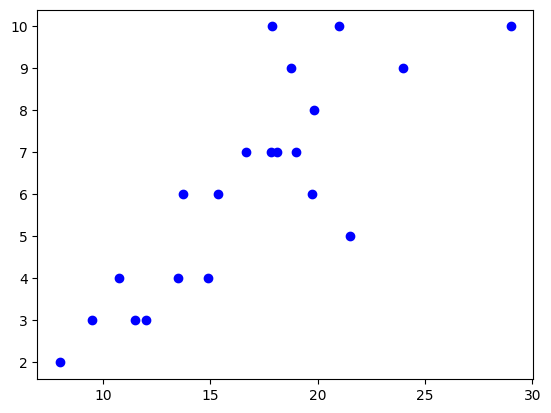

In [72]:
plt.plot(delivery['Delivery Time'], delivery['Sorting Time'], "bo")

<Axes: xlabel='Delivery Time', ylabel='Density'>

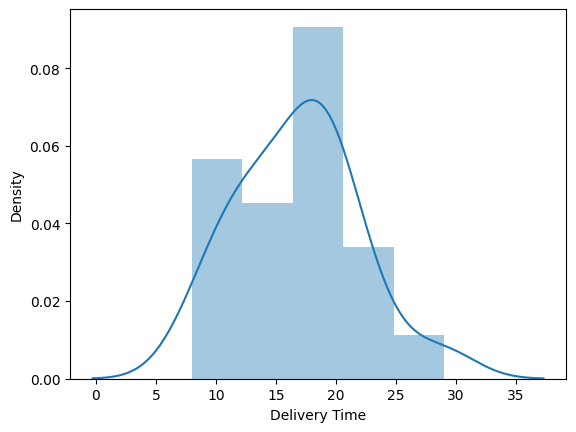

In [73]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(delivery['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

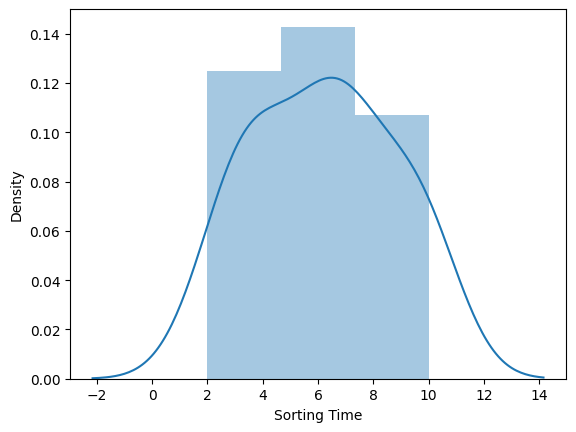

In [74]:
sns.distplot(delivery['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f04847e5b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f04847e60b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f04847e58d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f04847e65f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f04847e6890>,
 'means': []}

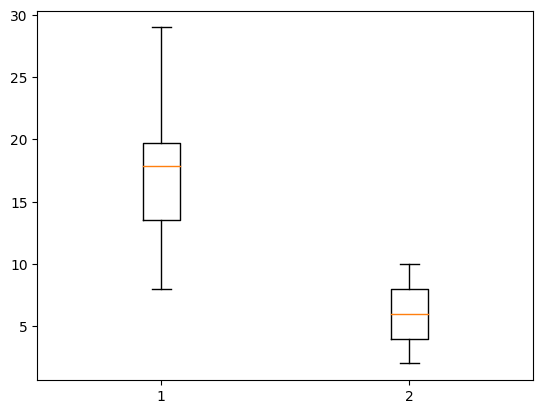

In [75]:
plt.boxplot(delivery)

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

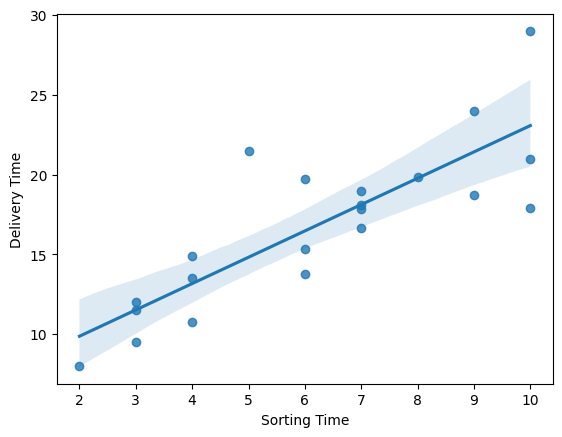

In [76]:
sns.regplot(x= 'Sorting Time', y= 'Delivery Time', data = delivery)

Correlation

In [77]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


***WITHOUT TRANSFORMATION***

In [78]:
model = smf.ols('Target~Ind', data = delivery).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           3.98e-06
Time:                        07:21:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Ind            1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model.params

Intercept    6.582734
Ind          1.649020
dtype: float64

***LOG TRANSFORMATION***

**MODEL 1**

In [81]:
Ind_log = np.log(delivery['Sorting Time'])
Target_log = np.log(delivery['Delivery Time'])
model1 = smf.ols('Target ~ Ind_log', data=delivery).fit()


In [82]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           2.64e-06
Time:                        07:21:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
Ind_log        9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
pred = model1.predict(pd.DataFrame(delivery['Sorting Time']))
pred

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [100]:
rmse1 = np.sqrt(np.mean((np.array(delivery['Delivery Time'])-np.array(pred))**2))
rmse1

2.733171476682066

In [85]:
pred.corr(Target)

0.8339325279256242

Text(0, 0.5, 'Delivery Time')

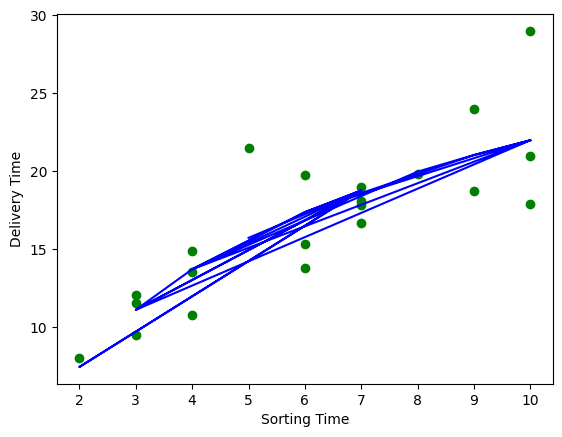

In [86]:
plt.scatter(x=delivery['Sorting Time'],y=delivery['Delivery Time'],color='green')
plt.plot(delivery['Sorting Time'],pred,color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

**MODEL 2**

In [87]:
model2 = smf.ols('Target_log ~ Ind', data=delivery).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Target_log   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           1.59e-06
Time:                        07:21:44   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Ind            0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
pred2_log = model2.predict(pd.DataFrame(delivery['Sorting Time']))
pred2_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [89]:
pred2 = np.exp(pred2_log)
pred2

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [101]:
rmse2 = np.sqrt(np.mean((np.array(delivery['Delivery Time'])-np.array(pred2))**2))
rmse2

2.9402503230562007

In [91]:
pred2.corr(Target)

0.8085780108289259

Text(0, 0.5, 'Delivery Time')

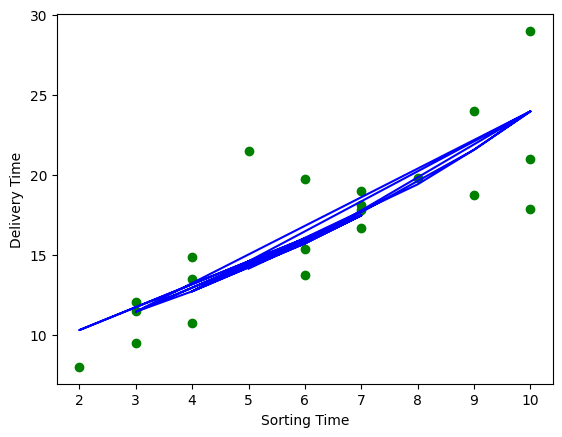

In [92]:
plt.scatter(x=delivery['Sorting Time'],y=delivery['Delivery Time'],color='green')
plt.plot(delivery['Sorting Time'],pred2,color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

**MODEL 3**

In [93]:
delivery['ST'] = delivery['Sorting Time']*delivery['Sorting Time']
delivery

,Delivery Time,Sorting Time,ST
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [94]:
model3 = smf.ols('np.log(Target) ~ Ind+ST', data=delivery).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Target)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Sat, 06 Apr 2024   Prob (F-statistic):           2.20e-06
Time:                        07:21:45   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
Ind            0.2659      0.080      3.315      0.004       0.097       0.434
ST            -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
pred3_quad = model3.predict(pd.DataFrame(delivery))
pred3=np.exp(pred3_quad)
pred3

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [102]:
rmse3 = np.sqrt(np.mean((np.array(delivery['Delivery Time'])-np.array(pred3))**2))
rmse3

2.799041988740932

In [98]:
pred3.corr(Target)

0.8258882749910925

Text(0, 0.5, 'Delivery Time')

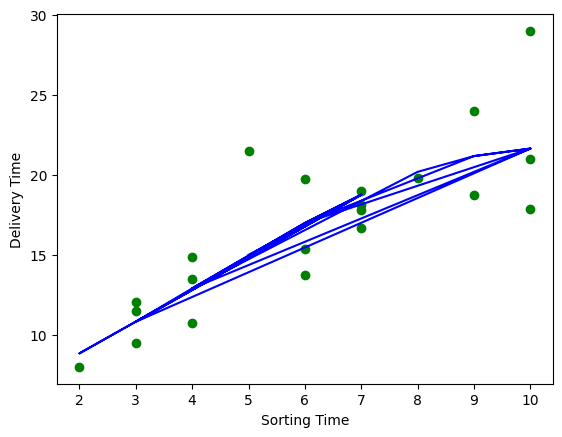

In [99]:
plt.scatter(x=delivery['Sorting Time'],y=delivery['Delivery Time'],color='green')
plt.plot(delivery['Sorting Time'],pred3,color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [104]:
data = {"MODEL":pd.Series(['model1','model2','model3']),
        "RMSE":pd.Series([rmse1,rmse2,rmse3]),
        "Rsquared":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE,Rsquared
0,model1,2.733171,0.695443
1,model2,2.940250,0.710948
2,model3,2.799042,0.764867


Choosing model 3 due to the high Rsquared value.